# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [15]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [16]:
accident_data_df = pd.read_csv("Cleaned_Accident_Data.csv")
accident_data_df["Make"]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total.Passengers,Fatality Ratio,Serious Injury Ratio,Aircraft Destroyed?,Make - Model
0,20001214X41937,Accident,CHI83FA069,1983-01-02,"GENOA CITY, WI",United States,Fatal(2),Destroyed,Airplane,N3168G,...,0.0,VMC,Maneuvering,Probable Cause,NaN,6.0,0.333333,0.333333,1.0,North american - T-6G
1,20001214X41919,Accident,ATL83FA081,1983-01-02,"BEAUFORT, SC",United States,Fatal(3),Destroyed,Airplane,N8066P,...,0.0,IMC,Cruise,Probable Cause,NaN,9.0,0.333333,0.333333,1.0,Piper - PA-24-250
2,20001214X42051,Accident,MIA83LA056,1983-01-02,"NEAR VERO BEACH, FL",United States,Non-Fatal,Substantial,Airplane,N35590,...,2.0,VMC,Maneuvering,Probable Cause,NaN,2.0,0.000000,0.000000,0.0,Piper - PA-32-301R
3,20001214X41994,Accident,FTW83LA073,1983-01-02,"BIG SPRING, TX",United States,Non-Fatal,Substantial,Airplane,N9435Q,...,3.0,VMC,Takeoff,Probable Cause,NaN,3.0,0.000000,0.000000,0.0,Beech - V-35B
4,20001214X41976,Accident,DEN83LA047,1983-01-02,"VERNAL, UT",United States,Non-Fatal,Substantial,Airplane,N6732B,...,2.0,VMC,Takeoff,Probable Cause,NaN,2.0,0.000000,0.000000,0.0,Beech - A36


## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [17]:
#Dividing planes into less than 20 passengers and greater than and equal to 20
large_plane_df = accident_data_df[accident_data_df["Total.Passengers"] >= 20]
small_plane_df = accident_data_df[accident_data_df["Total.Passengers"] < 20]

In [18]:
large_plane_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2762 entries, 7 to 55902
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                2762 non-null   object 
 1   Investigation.Type      2762 non-null   object 
 2   Accident.Number         2762 non-null   object 
 3   Event.Date              2762 non-null   object 
 4   Location                2756 non-null   object 
 5   Country                 2752 non-null   object 
 6   Injury.Severity         2762 non-null   object 
 7   Aircraft.damage         1637 non-null   object 
 8   Aircraft.Category       2762 non-null   object 
 9   Registration.Number     2533 non-null   object 
 10  Make                    2762 non-null   object 
 11  Model                   2762 non-null   object 
 12  Number.of.Engines       2125 non-null   float64
 13  Engine.Type             2114 non-null   object 
 14  Purpose.of.flight       1352 non-null   obje

In [35]:
large_plane_df["Make"].value_counts()

Make
Boeing                       1390
Mcdonnell douglas             329
Airbus industrie              133
Airbus                        133
Embraer                       114
Douglas                        91
Cessna                         80
Beech                          61
De havilland                   48
Fokker                         46
Bombardier inc                 46
Lockheed                       41
Aerospatiale                   39
Bombardier                     38
Piper                          36
British aerospace              35
Canadair                       22
Fairchild                      15
Bell                           11
Swearingen                      8
Grumman                         7
Dehavilland                     5
Aero commander                  4
Pilatus                         4
Learjet                         4
Sikorsky                        3
Gulfstream                      3
Mitsubishi                      3
Eurocopter                      2
Let      

#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

In [39]:
# Grouping large and small planes data by make
large_plane_grouped = large_plane_df.groupby("Make")["Fatality Ratio"].mean()
small_plane_grouped = small_plane_df.groupby("Make")["Fatality Ratio"].mean()

# Sorting by ascending injury fraction
sorted_large = large_plane_grouped.sort_values(ascending=True)
sorted_small = small_plane_grouped.sort_values(ascending=True)

In [40]:
# Separating out the top 15 for each category
top_15_large = sorted_large.head(15)
top_15_small = sorted_small.head(15)

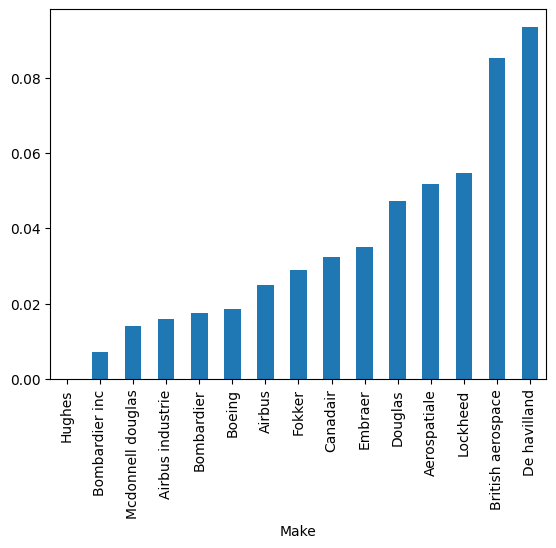

In [41]:
barplot_large = top_15_large.plot(kind="bar")

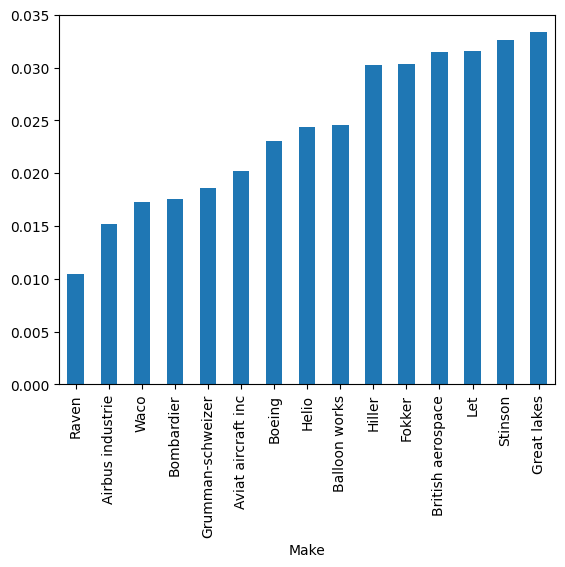

In [42]:
barplot_small = top_15_small.plot(kind="bar")

**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.